# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [114]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [57]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [58]:
#Begin Establishing Dependencies
record_number = 1
set_number = 1
units = "Imperial"

#Make lists to store data from JSON into dataframe
cities_list = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


#Print Data Retrieval for Cities

print("Beginning Data Retrieval")
print("------------------------")

for city_name in cities:
    if record_number > 50:
            set_number = set_number + 1
            record_number = 1
    weather_url = "http://api.openweathermap.org/data/2.5/weather?"+"&appid="+ weather_api_key + "&q=" + city_name + "&units=" + units
    print(f"Processing Record {record_number} of Set {set_number} | {city_name}")
    record_number = record_number + 1
    weather_json = requests.get(weather_url).json()
    if weather_json['cod']==200:
        cities_list.append(weather_json["name"])
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | ilulissat
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | sinop
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | sao felix do xingu
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | mugumu
Processing Record 8 of Set 1 | barentsburg
Processing Record 9 of Set 1 | yuzhno-yeniseyskiy
Processing Record 10 of Set 1 | saint george
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | birao
Processing Record 13 of Set 1 | mackay
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | cherskiy
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | sibolga
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | lavrentiya
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | nouadhibou
Processing Record 22 of Set 1 | port alfred
Processing Record 23 of Set 1 | sam

Processing Record 48 of Set 4 | mananjary
Processing Record 49 of Set 4 | egvekinot
Processing Record 50 of Set 4 | sokoni
Processing Record 1 of Set 5 | tumannyy
Processing Record 2 of Set 5 | bandarbeyla
Processing Record 3 of Set 5 | beyneu
Processing Record 4 of Set 5 | warqla
Processing Record 5 of Set 5 | qaanaaq
Processing Record 6 of Set 5 | buenos aires
Processing Record 7 of Set 5 | lagoa
Processing Record 8 of Set 5 | havre-saint-pierre
Processing Record 9 of Set 5 | puerto escondido
Processing Record 10 of Set 5 | flinders
Processing Record 11 of Set 5 | nantucket
Processing Record 12 of Set 5 | dalvik
Processing Record 13 of Set 5 | leningradskiy
Processing Record 14 of Set 5 | nanortalik
Processing Record 15 of Set 5 | alindao
Processing Record 16 of Set 5 | japura
Processing Record 17 of Set 5 | coahuayana
Processing Record 18 of Set 5 | amderma
Processing Record 19 of Set 5 | coihaique
Processing Record 20 of Set 5 | saint-philippe
Processing Record 21 of Set 5 | hasaki

Processing Record 48 of Set 8 | maniitsoq
Processing Record 49 of Set 8 | tilichiki
Processing Record 50 of Set 8 | saint-pierre
Processing Record 1 of Set 9 | dryden
Processing Record 2 of Set 9 | ulladulla
Processing Record 3 of Set 9 | adrar
Processing Record 4 of Set 9 | faanui
Processing Record 5 of Set 9 | taizhou
Processing Record 6 of Set 9 | okakarara
Processing Record 7 of Set 9 | attawapiskat
Processing Record 8 of Set 9 | yuzhne
Processing Record 9 of Set 9 | kutoarjo
Processing Record 10 of Set 9 | nylstroom
Processing Record 11 of Set 9 | qui nhon
Processing Record 12 of Set 9 | qunduz
Processing Record 13 of Set 9 | camana
Processing Record 14 of Set 9 | louisbourg
Processing Record 15 of Set 9 | chebarkul
Processing Record 16 of Set 9 | bakurianis andeziti
Processing Record 17 of Set 9 | jumla
Processing Record 18 of Set 9 | meulaboh
Processing Record 19 of Set 9 | burlington
Processing Record 20 of Set 9 | petropavlovsk-kamchatskiy
Processing Record 21 of Set 9 | port 

Processing Record 44 of Set 12 | kansanshi
Processing Record 45 of Set 12 | fernley
Processing Record 46 of Set 12 | garden city
Processing Record 47 of Set 12 | pereslavl-zalesskiy
Processing Record 48 of Set 12 | batouri
Processing Record 49 of Set 12 | chernyshevskiy
Processing Record 50 of Set 12 | rincon
Processing Record 1 of Set 13 | rudiskes
Processing Record 2 of Set 13 | camacha
Processing Record 3 of Set 13 | urubicha
Processing Record 4 of Set 13 | bartica
Processing Record 5 of Set 13 | praia da vitoria
Processing Record 6 of Set 13 | hit
Processing Record 7 of Set 13 | dar es salaam
Processing Record 8 of Set 13 | sitka
Processing Record 9 of Set 13 | baykit
Processing Record 10 of Set 13 | taltal
Processing Record 11 of Set 13 | churapcha
Processing Record 12 of Set 13 | cayenne
Processing Record 13 of Set 13 | tutoia
Processing Record 14 of Set 13 | tuggurt
Processing Record 15 of Set 13 | la palma
Processing Record 16 of Set 13 | revelstoke
Processing Record 17 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [73]:
#Check the total count for each weather variable we are analyzing:
    # cities_list
    # cloudiness
    # country
    # date
    # humidity
    # lat
    # lng
    # max_temp 
    # wind_speed

print("Weather Variable Check")
print("----------------------")
print(f'City: {len(cities_list)}')
print(f'Cloudiness: {len(cloudiness)}')
print(f'Country: {len(country)}')
print(f'Date: {len(date)}')
print(f'Humidity: {len(humidity)}')
print(f'Lat: {len(lat)}')
print(f'Lng: {len(lng)}')
print(f'Max Temp: {len(max_temp)}')
print(f'Wind Speed: {len(wind_speed)}')

Weather Variable Check
----------------------
City: 557
Cloudiness: 557
Country: 557
Date: 557
Humidity: 557
Lat: 557
Lng: 557
Max Temp: 557
Wind Speed: 557


In [74]:
#Establish Weather Dataframe
weather_df = pd.DataFrame({"Cities": cities_list, 
                           "Cloudiness": cloudiness,
                           "Country": country,
                           "Date": date,
                           "Humidity": humidity,
                           "Latitude": lat,
                           "Longitude": lng,
                           "Max Temp": max_temp,
                           "Wind Speed": wind_speed,
                          })
weather_df

Cities  Cloudiness Country        Date  Humidity  Latitude  \
0             Ilulissat          99      GL  1579928265        43     69.22   
1                 Vaini          75      TO  1579928329        88    -21.20   
2                 Sinop           0      TR  1579928329        56     41.77   
3                Albany           1      US  1579928121        94     42.60   
4    Sao Felix do Xingu         100      BR  1579928331        97     -6.64   
..                  ...         ...     ...         ...       ...       ...   
552             Cayenne          75      GF  1579928605        88      4.93   
553              Tutoia          66      BR  1579928584        94     -2.76   
554            La Palma          90      US  1579928606       100     33.85   
555          Revelstoke          90      CA  1579928418       100     50.98   
556               Jatai          88      BR  1579928607        98    -17.88   

     Longitude  Max Temp  Wind Speed  
0       -51.10     12.20       20.80  
1      -175.20     78.80        6.93  
2        34.87     37.20        4.34  
3       -73.97     37.40        4.70  
4       -51.99     71.44        1.21  
..         ...       ...         ...  
552     -52.33     78.80        4.70  
553     -42.27     75.72        3.47  
554    -118.05     62.01        5.82  
555    -118.20     33.80        5.82  
556     -51.71     69.31        0.78  

[557 rows x 9 columns]

In [75]:
#Export city data into a CSV file
cities_weather_export = weather_df.to_csv('cities_weather.csv')
cities_weather_export

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

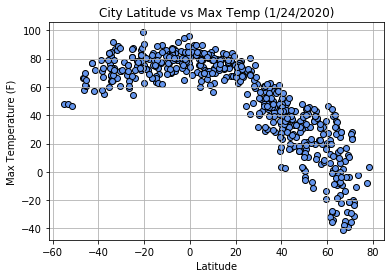

In [76]:
# Create scatter plot showing latitude versus temperature
plt.scatter(lat, max_temp, marker="o", facecolors="cornflowerblue",edgecolors="black")

# Plot labels, gridlines, etc.
plt.title("City Latitude vs Max Temp (1/24/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("Lat_v_Temp_Plot.png")

# Show the scatterplot
plt.show()

In [ ]:
# Latitude vs Max Temp - what's going on?
    # The code is showing the the relationship between each city's latitude and its max temperature (F).
    # What the plot shows here is the max temperature gets higher the closer to the equator you get.

#### Latitude vs. Humidity Plot

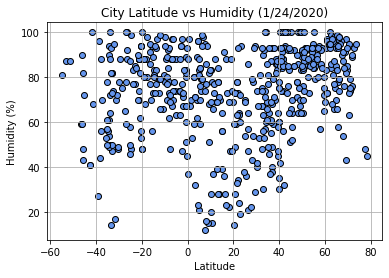

In [77]:
# Create scatter plot showing latitude versus humidity
plt.scatter(lat, humidity, marker="o", facecolors="cornflowerblue",edgecolors="black")

# Plot labels, gridlines, etc.
plt.title("City Latitude vs Humidity (1/24/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("Lat_v_Hum_Plot.png")

# Show the scatterplot
plt.show()

In [111]:
# Latitude vs. Humidity Plot - what's going on?
    # The code is showing the the relationship between each city's latitude and its humidity %.
    # Something interesting the plot appears to show is a clustering of higher humidities between 60 and 80% for Latitudes between ~25 and 70. 

#### Latitude vs. Cloudiness Plot

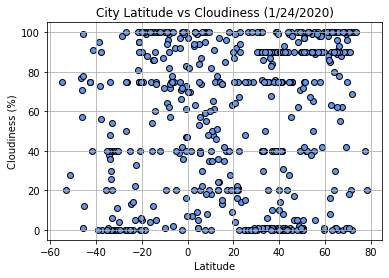

In [78]:
# Create scatter plot showing latitude versus cloudiness
plt.scatter(lat, cloudiness, marker="o", facecolors="cornflowerblue",edgecolors="black")

# Plot labels, gridlines, etc.
plt.title("City Latitude vs Cloudiness (1/24/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("Lat_v_Cloud_Plot.png")

# Show the scatterplot
plt.show()

In [ ]:
# Latitude vs. Cloudiness Plot - what's going on?
    # The plot is showing the relationship between a city's latitude and its cloudiness (%)
    # Interestingly, there appears to be a variety of clustering for various % cloudiness and latitudes. For example, cities between -40 lat and -20 lat and between 20 lat and 50 lat have 0% cloudiness.

#### Latitude vs. Wind Speed Plot

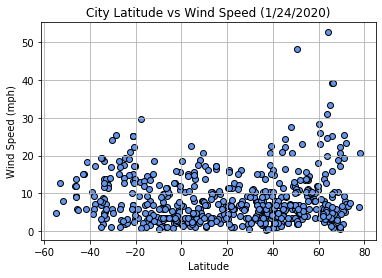

In [79]:
# Create scatter plot showing latitude versus wind speed
plt.scatter(lat, wind_speed, marker="o", facecolors="cornflowerblue",edgecolors="black")

# Plot labels, gridlines, etc.
plt.title("City Latitude vs Wind Speed (1/24/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("Lat_v_Wind_Plot.png")

# Show the scatterplot
plt.show()

In [ ]:
# Latitude vs. Wind Speed Plot - what's going on?
    # The plot is showing the relationship between a city's latitude and its wind speed (mph)
    # Cities between -40 and about 70 lat have wind speeds mostly betwwen 0 to 20 mph. 

## Linear Regression

In [80]:
# OPTIONAL: Create a function to create Linear Regression plots


In [81]:
# Create Northern and Southern Hemisphere DataFrames

# Bin hemispheres
bins = [-200, 0, 200]
hemisphere = ["Southern Hemisphere", "Northern Hemisphere"]


# Add Hemisphere designation to weather dataframe
weather_df["Hemisphere"] = pd.cut(weather_df["Latitude"], bins, labels = hemisphere)
weather_df

Cities  Cloudiness Country        Date  Humidity  Latitude  \
0             Ilulissat          99      GL  1579928265        43     69.22   
1                 Vaini          75      TO  1579928329        88    -21.20   
2                 Sinop           0      TR  1579928329        56     41.77   
3                Albany           1      US  1579928121        94     42.60   
4    Sao Felix do Xingu         100      BR  1579928331        97     -6.64   
..                  ...         ...     ...         ...       ...       ...   
552             Cayenne          75      GF  1579928605        88      4.93   
553              Tutoia          66      BR  1579928584        94     -2.76   
554            La Palma          90      US  1579928606       100     33.85   
555          Revelstoke          90      CA  1579928418       100     50.98   
556               Jatai          88      BR  1579928607        98    -17.88   

     Longitude  Max Temp  Wind Speed           Hemisphere  
0       -51.10     12.20       20.80  Northern Hemisphere  
1      -175.20     78.80        6.93  Southern Hemisphere  
2        34.87     37.20        4.34  Northern Hemisphere  
3       -73.97     37.40        4.70  Northern Hemisphere  
4       -51.99     71.44        1.21  Southern Hemisphere  
..         ...       ...         ...                  ...  
552     -52.33     78.80        4.70  Northern Hemisphere  
553     -42.27     75.72        3.47  Southern Hemisphere  
554    -118.05     62.01        5.82  Northern Hemisphere  
555    -118.20     33.80        5.82  Northern Hemisphere  
556     -51.71     69.31        0.78  Southern Hemisphere  

[557 rows x 10 columns]

In [82]:
# Make Northern Hemisphere Dataframe
nh_only = weather_df['Hemisphere']=='Northern Hemisphere'
nh_only

nh_df = weather_df[nh_only]
nh_df

Cities  Cloudiness Country        Date  Humidity  Latitude  \
0       Ilulissat          99      GL  1579928265        43     69.22   
2           Sinop           0      TR  1579928329        56     41.77   
3          Albany           1      US  1579928121        94     42.60   
7    Saint George           1      US  1579928127        59     37.10   
9           Birao          18      CF  1579928334        20     10.28   
..            ...         ...     ...         ...       ...       ...   
549        Baykit          86      RU  1579928604        95     61.67   
551     Churapcha          16      RU  1579928604        95     62.00   
552       Cayenne          75      GF  1579928605        88      4.93   
554      La Palma          90      US  1579928606       100     33.85   
555    Revelstoke          90      CA  1579928418       100     50.98   

     Longitude  Max Temp  Wind Speed           Hemisphere  
0       -51.10     12.20       20.80  Northern Hemisphere  
2        34.87     37.20        4.34  Northern Hemisphere  
3       -73.97     37.40        4.70  Northern Hemisphere  
7      -113.58     46.99        0.34  Northern Hemisphere  
9        22.79     56.50       17.31  Northern Hemisphere  
..         ...       ...         ...                  ...  
549      96.37     19.45        4.41  Northern Hemisphere  
551     132.43    -35.70        4.07  Northern Hemisphere  
552     -52.33     78.80        4.70  Northern Hemisphere  
554    -118.05     62.01        5.82  Northern Hemisphere  
555    -118.20     33.80        5.82  Northern Hemisphere  

[382 rows x 10 columns]

In [83]:
# Make Southern Hemisphere Dataframe
sh_only = weather_df['Hemisphere']=='Southern Hemisphere'
sh_only

sh_df = weather_df[sh_only]
sh_df

Cities  Cloudiness Country        Date  Humidity  Latitude  \
1                 Vaini          75      TO  1579928329        88    -21.20   
4    Sao Felix do Xingu         100      BR  1579928331        97     -6.64   
5             Carnarvon           0      AU  1579928331        48    -24.87   
6                Mugumu          99      TZ  1579928332        71     -1.85   
8            Bredasdorp          38      ZA  1579928267        94    -34.53   
..                  ...         ...     ...         ...       ...       ...   
543            Urubicha          54      BO  1579928599        56    -15.38   
547       Dar es Salaam          75      TZ  1579928334        88     -6.82   
550              Taltal           0      CL  1579928604        87    -25.40   
553              Tutoia          66      BR  1579928584        94     -2.76   
556               Jatai          88      BR  1579928607        98    -17.88   

     Longitude  Max Temp  Wind Speed           Hemisphere  
1      -175.20     78.80        6.93  Southern Hemisphere  
4       -51.99     71.44        1.21  Southern Hemisphere  
5       113.63     87.80       19.46  Southern Hemisphere  
6        34.70     70.95        3.65  Southern Hemisphere  
8        20.04     68.00        2.82  Southern Hemisphere  
..         ...       ...         ...                  ...  
543     -62.95     75.78        1.01  Southern Hemisphere  
547      39.27     80.60       11.41  Southern Hemisphere  
550     -70.48     67.57        2.80  Southern Hemisphere  
553     -42.27     75.72        3.47  Southern Hemisphere  
556     -51.71     69.31        0.78  Southern Hemisphere  

[175 rows x 10 columns]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The pearson correlation is: -0.87
The r-squared is: -0.8740537449743527


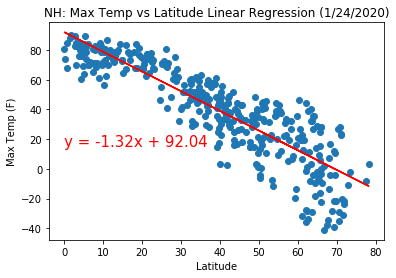

In [119]:
# Build linear regression for Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = nh_df['Latitude']
y_values = nh_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot linear regression for Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0,15), fontsize=15,color="red")
plt.title("NH: Max Temp vs Latitude Linear Regression (1/24/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Added in Pearson correlation
correlation = st.pearsonr(x_values, y_values)
print(f'The pearson correlation is: {round(correlation[0],2)}')

# Print r-squared value
print(f"The r-squared is: {rvalue}")

# Save the figure and show it
plt.savefig("NH_Temp_vs_Lat_LinReg.png")
plt.show()

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The pearson correlation is: 0.5
The r-squared is: 0.49671774398272917


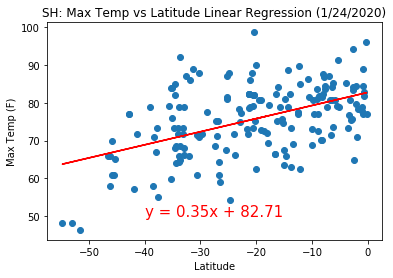

In [120]:
# Build linear regression for Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = sh_df['Latitude']
y_values = sh_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot linear regression for Southern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-40, 50), fontsize=15,color="red")
plt.title("SH: Max Temp vs Latitude Linear Regression (1/24/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Print pearson correlation
correlation = st.pearsonr(x_values, y_values)
print(f'The pearson correlation is: {round(correlation[0],2)}')

# Print r-squared value
print(f"The r-squared is: {rvalue}")

# Save the figure and show it
plt.savefig("SH_Temp_vs_Lat_LinReg.png")
plt.show()

In [ ]:
# What's happening in the Max Temp vs Latitude linear regressions?
    # For the Northern Hemisphere, there is a strong negative relationship (r squared = -0.87) between the max temp and a city's latitude. The further from the equator, the max tempertature decreases.
    # For the Southern Hemisphere, there is a moderately postive relationship (r squared = 0.50) between the max temp and a city's latitude. The closer a city's latitude is to the equator, the higher its maximum temp. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The pearson correlation is: 0.39
The r-squared is: 0.39375436098048033


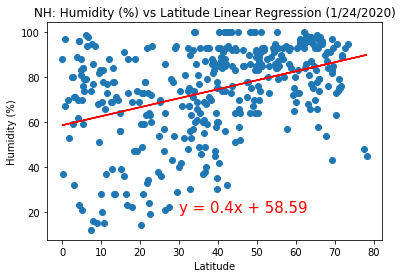

In [121]:
# Build linear regression for Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = nh_df['Latitude']
y_values = nh_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot linear regression for Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (30,20), fontsize=15,color="red")
plt.title("NH: Humidity (%) vs Latitude Linear Regression (1/24/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Print pearson correlation
correlation = st.pearsonr(x_values, y_values)
print(f'The pearson correlation is: {round(correlation[0],2)}')

# Print r-squared value
print(f"The r-squared is: {rvalue}")

# Save the figure and show it
plt.savefig("NH_Hum_vs_Lat_LinReg.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The pearson correlation is: 0.23
The r-squared is: 0.233707860385473


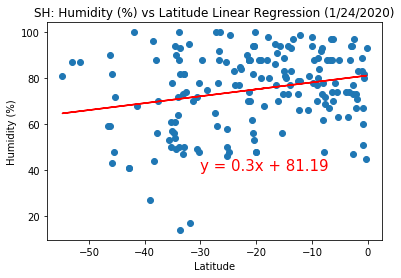

In [122]:
# Build linear regression for Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = sh_df['Latitude']
y_values = sh_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot linear regression for Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-30, 40), fontsize=15,color="red")
plt.title("SH: Humidity (%) vs Latitude Linear Regression (1/24/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Print pearson correlation
correlation = st.pearsonr(x_values, y_values)
print(f'The pearson correlation is: {round(correlation[0],2)}')

# Print r-squared value
print(f"The r-squared is: {rvalue}")

# Save the figure and show it
plt.savefig("SH_Hum_vs_Lat_LinReg.png")
plt.show()

In [ ]:
# What's happening in the Humidity % vs Latitude linear regressions?
    # For the Northern Hemisphere, there is a positive relationship (r squared = 0.39) between the humidity % and a city's latitude. Cities with latitudes moving away from the equator have increasing humidity %s.
    # For the Southern Hemisphere, there is a weaker postive relationship (r squared = 0.23) between the the humidity % and a city's latitude. Cities with latitudes moving toward the equator have increasing humidity %s, but this relationship is weaker than those cities in analyzed in the Northern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The pearson correlation is: 0.21
The r-squared is: 0.21025747483801677


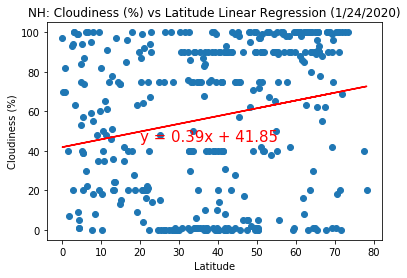

In [123]:
# Build linear regression for Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = nh_df['Latitude']
y_values = nh_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot linear regression for Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20, 45), fontsize=15,color="red")
plt.title("NH: Cloudiness (%) vs Latitude Linear Regression (1/24/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Print pearson correlation
correlation = st.pearsonr(x_values, y_values)
print(f'The pearson correlation is: {round(correlation[0],2)}')

# Print r-squared value
print(f"The r-squared is: {rvalue}")

# Save the figure and show it
plt.savefig("NH_Cloud_vs_Lat_LinReg.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The pearson correlation is: 0.34
The r-squared is: 0.34448703897686084


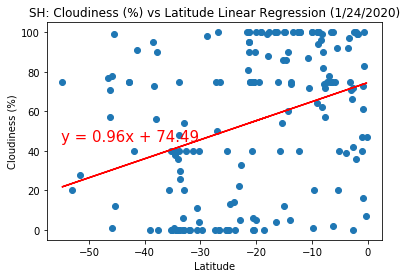

In [124]:
# Build linear regression for Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = sh_df['Latitude']
y_values = sh_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot linear regression for Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,45), fontsize=15,color="red")
plt.title("SH: Cloudiness (%) vs Latitude Linear Regression (1/24/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Print pearson correlation
correlation = st.pearsonr(x_values, y_values)
print(f'The pearson correlation is: {round(correlation[0],2)}')

# Print r-squared value
print(f"The r-squared is: {rvalue}")

# Save the figure and show it
plt.savefig("SH_Cloud_vs_Lat_LinReg.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The pearson correlation is: 0.17
The r-squared is: 0.17309832031067232


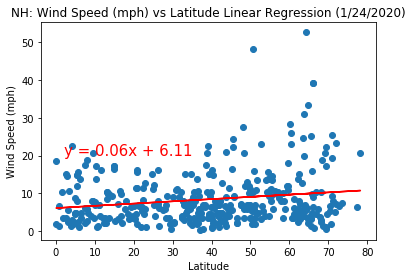

In [125]:
# Build linear regression for Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = nh_df['Latitude']
y_values = nh_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot linear regression for Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (2, 20), fontsize=15,color="red")
plt.title("NH: Wind Speed (mph) vs Latitude Linear Regression (1/24/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Print pearson correlation
correlation = st.pearsonr(x_values, y_values)
print(f'The pearson correlation is: {round(correlation[0],2)}')

# Print r-squared value
print(f"The r-squared is: {rvalue}")

# Save the figure and show it
plt.savefig("NH_Wind_vs_Lat_LinReg.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The pearson correlation is: -0.24
The r-squared is: -0.23902501806758963


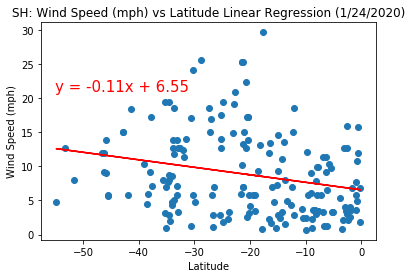

In [126]:
# Build linear regression for Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = sh_df['Latitude']
y_values = sh_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot linear regression for Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,21), fontsize=15,color="red")
plt.title("SH: Wind Speed (mph) vs Latitude Linear Regression (1/24/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Print pearson correlation
correlation = st.pearsonr(x_values, y_values)
print(f'The pearson correlation is: {round(correlation[0],2)}')

# Print r-squared value
print(f"The r-squared is: {rvalue}")

# Save the figure and show it
plt.savefig("SH_Wind_vs_Lat_LinReg.png")
plt.show()